We are planning to use complex to complex 2D FFT to build complex to real 2D FFT. The question is how.

Someone suggested to apply 2D FFT to two UV planes simultaneously and push the result of one UV plane to the real part and the other UV result to image part of the complex 2D FFT output. 

Here the code build new UV planes from the original one. 
One new UV plane with hermitian property and the other UV plane with anti-hermetiaon property. 
If the suggestion works, the real part of 2D FFT output of the first new UV plane should be the same as the image prt of the 2D FFT of the second new UV plane. However, I do not see that, anything worng here? 

In [468]:
import numpy as np
from pylab import *
%matplotlib inline

np.set_printoptions(precision=3)

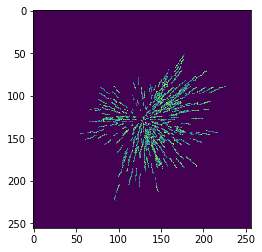

In [469]:
N = 256
# First to simulate a uv plane all cells have data
uv_full = np.random.random_sample((N,N)) + np.random.random_sample((N,N))*1j

# Real coordinate
coord = np.loadtxt("coord.txt").astype(int)

# Now only keep data at given coordinate
row_indices = coord[:,0]
col_indices = coord[:,1]
uv_indices  = np.zeros((N,N))
uv_indices[row_indices, col_indices] = 1
uv = uv_full * uv_indices
imshow(np.abs(uv))

The hermitian function should build a new UV plane with hermitian property as the image part of the 2D FFT output of the new plane is zero.

In [470]:
# Function to create matrxi with hermitian function property
def hermitian(uv, coord, N):
    
    uv_hermitian = np.zeros((N, N), dtype=np.complex64)
    for index in range(len(coord)):
        row   = coord[index, 0]
        col   = coord[index, 1]
        h_row = (N-row)%N
        h_col = (N-col)%N
        
        uv_hermitian[row, col]     = uv[row, col]
        uv_hermitian[h_row, h_col] = np.conj(uv[row, col])
    return uv_hermitian

3186.2747578495764 9.425793479067579e-14


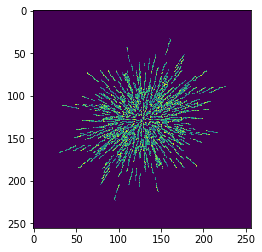

In [471]:
# UV plane with hermitian property
uv_h = hermitian(uv, coord, N)
imshow(np.abs(uv_h))

# Image part of 2D complex to complex FFT of hermitian UV plane should be close to zero
# Real part should be big
h_imag = np.fft.fft2(np.fft.fftshift(uv_h))
print np.abs(h_imag.real).max(), np.abs(h_imag.imag).max()

The anti_hermitian function should build a new UV plane with anti hermitian property as the real part of the 2D FFT output of the new plane is zero.

In [472]:
# Function to create matrxi with anti-hermitian function property
def anti_hermitian(uv, coord, N):
    
    uv_anti_hermitian = np.zeros((N, N), dtype=np.complex64)
    for index in range(len(coord)):
        row   = coord[index, 0]
        col   = coord[index, 1]
        h_row = (N-row)%N
        h_col = (N-col)%N
        
        uv_anti_hermitian[row, col]     = uv[row, col]
        uv_anti_hermitian[h_row, h_col] = -np.conj(uv[row, col])
    return uv_anti_hermitian

1.804667526528192e-13 3298.8024331777488


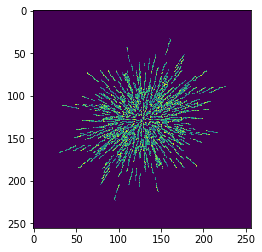

In [473]:
# UV plane with anti-hermitian property
uv_ah = anti_hermitian(uv, coord, N)
imshow(np.abs(uv_ah))

# Image part of 2D complex to complex FFT to anti hermitian UV plane should be big
# Real part should be close to zero
ah_imag = np.fft.fft2(np.fft.fftshift(uv_ah))
print np.abs(ah_imag.real).max(), np.abs(ah_imag.imag).max()

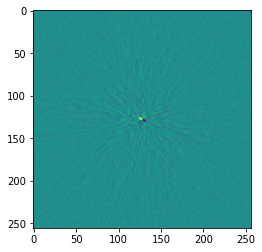

In [474]:
imshow(np.fft.fftshift(ah_imag).imag-np.fft.fftshift(h_imag).real)

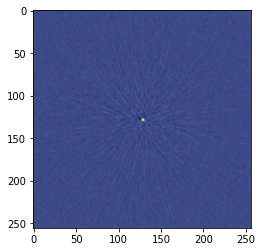

In [475]:
imshow(np.fft.fftshift(h_imag).real)

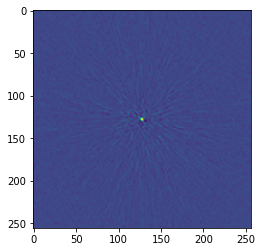

In [476]:
imshow(np.fft.fftshift(ah_imag).imag)

In [477]:
print np.fft.fftshift(ah_imag).imag

[[ 12.435  29.182  42.374 ... -34.757   8.557  15.824]
 [ 27.222  55.983  44.887 ... -57.495 -22.168  -0.268]
 [ 14.141  29.506  13.984 ...  18.917  20.881   6.95 ]
 ...
 [ 20.185   6.182  31.121 ...  77.336  53.433  43.067]
 [  2.986  10.906  59.237 ... 105.581  70.437  31.595]
 [ -7.739   4.906  50.742 ...  57.819  58.558  24.488]]


In [478]:
print np.fft.fftshift(h_imag).real

[[  7.617  -3.34   -2.021 ...  58.735  45.143  27.419]
 [-23.42    9.502  38.884 ...  17.9     4.082 -20.274]
 [-24.173  21.096  57.718 ...   5.787   9.06  -20.002]
 ...
 [ -2.252 -18.099 -13.802 ...  48.292  43.866  14.807]
 [ 19.526 -14.8   -17.694 ...  74.008  86.282  55.175]
 [ 30.581  -8.676 -18.981 ...  76.885  84.407  65.918]]


In [479]:
fft_result1 = np.abs(np.fft.fftshift(h_imag).real)
fft_result2 = np.abs(np.fft.fftshift(ah_imag).imag)

In [480]:
print np.where(fft_result1==fft_result2[1,1]) # The result is fully different from each other

(array([], dtype=int64), array([], dtype=int64))
